In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0dec8e6e01eaa9bb49e5ac0a9ab622d8


In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

import Citypy scrript from citypy module

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | artyk
City not found. Skipping...
Processing Record 7 of Set 1 | chelmno
Processing Record 8 of Set 1 | thohoyandou
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | pangody
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | huarmey
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | miquelon
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | nuuk
Processing Record 22 of Set 1 | hammerfest
Processing Record 

In [7]:
len(city_data)


575

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,90.28,89,48,1.01,US,2021-11-19 21:59:32
1,Punta Arenas,-53.1500,-70.9167,51.91,62,20,40.29,CL,2021-11-19 21:57:22
2,Bengkulu,-3.8004,102.2655,75.11,88,100,4.29,ID,2021-11-19 21:59:30
3,Busselton,-33.6500,115.3333,54.05,77,0,10.31,AU,2021-11-19 21:59:02
4,Pevek,69.7008,170.3133,-5.13,85,56,5.39,RU,2021-11-19 21:59:25
5,Chelmno,53.3485,18.4251,54.45,74,93,22.66,PL,2021-11-19 22:03:16
6,Thohoyandou,-22.9456,30.4850,65.88,75,100,4.43,ZA,2021-11-19 22:03:17
7,Codrington,-38.2667,141.9667,54.99,58,70,9.37,AU,2021-11-19 21:59:46
8,Ushuaia,-54.8000,-68.3000,46.06,57,40,40.29,AR,2021-11-19 21:57:48
9,Tasiilaq,65.6145,-37.6368,14.94,70,99,5.75,GL,2021-11-19 21:59:52


Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

new_column_order = ["column2", "column4", "column1"]

Then, we assign a new or the same DataFrame with new column order:

df = df[new_column_order]

In [17]:
new_column_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order] 

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-11-19 21:59:32,19.7297,-155.0900,90.28,89,48,1.01
1,Punta Arenas,CL,2021-11-19 21:57:22,-53.1500,-70.9167,51.91,62,20,40.29
2,Bengkulu,ID,2021-11-19 21:59:30,-3.8004,102.2655,75.11,88,100,4.29
3,Busselton,AU,2021-11-19 21:59:02,-33.6500,115.3333,54.05,77,0,10.31
4,Pevek,RU,2021-11-19 21:59:25,69.7008,170.3133,-5.13,85,56,5.39
...,...,...,...,...,...,...,...,...,...
570,Mehamn,NO,2021-11-19 21:59:19,71.0357,27.8492,37.31,99,100,18.37
571,Outjo,NA,2021-11-19 22:05:38,-20.1167,16.1500,70.45,21,1,12.39
572,Yeniseysk,RU,2021-11-19 22:05:39,58.4497,92.1703,4.37,92,100,5.50
573,Baruun-Urt,MN,2021-11-19 22:05:39,46.6806,113.2792,14.86,49,23,4.50


Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

new_column_order = ["column2", "column4", "column1"]

Then, we assign a new or the same DataFrame with new column order:

df = df[new_column_order]

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time

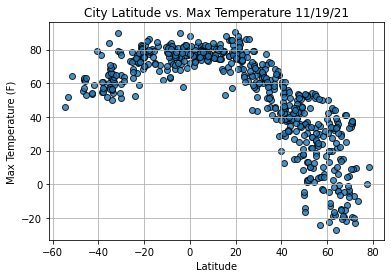

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

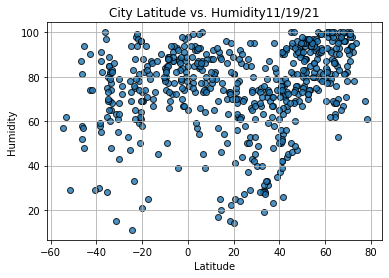

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

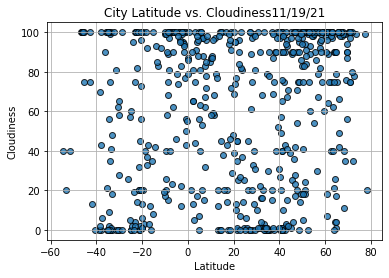

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

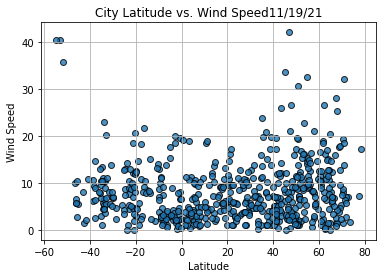

In [33]:
# Build the scatter plot
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()